In [15]:
from sklearn import tree
import pandas as pd
import numpy as np
import os as oss
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate, KFold, train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer, f1_score, recall_score
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import cross_val_score

import pydotplus, pprint
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.linear_model import LogisticRegression

from catboost import CatBoostClassifier, CatBoost
import lightgbm as lgb
import xgboost as xgb
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [84]:
datas=pd.read_csv("../etc/windows_features/clipped_std_features.csv")

In [91]:
moving=datas[datas['label']=='m']
observing=datas[datas['label']=='o']
searching=datas[datas['label']=='s']

moving['index']=1
searching['index']=2
observing['index']=3
"""
moving_train, moving_test=train_test_split(moving, train_size=6000)
observing_train, observing_test=train_test_split(observing, train_size=6000)
searching_train, searching_test=train_test_split(searching, train_size=6000)

df_train=pd.concat([moving_train, searching_train, observing_train])
df_test=pd.concat([moving_test, searching_test, observing_test])

x_train=df_train.drop(['label', 'user', 'index'], axis=1)
y_train=df_train[['index']]
x_test=df_test.drop(['label', 'user', 'index'], axis=1)
y_test=df_test[['index']]
"""

df=pd.concat([moving, searching, observing])
x=df.drop(['label', 'user', 'index'], axis=1)
y=df[['index']]


/home/nishiolab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/nishiolab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nishiolab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [96]:
x_train=x[6000:]
y_train=y[6000:]
x_test=x[:6000]
y_test=y[:6000]

# L-SVC

In [13]:
svc=svm.LinearSVC(loss='hinge', C=1.0, class_weight='balanced', random_state=0, max_iter=10000)

scores=cross_val_score(svc, x, y, cv=10 ,n_jobs=-1)
print('Cross-Validation scores: {}'.format(scores))
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

Cross-Validation scores: [0.65366035 0.65477518 0.67595689 0.66133829 0.60966543 0.64386617
 0.63494424 0.67583643 0.65315985 0.60297398]
平均正解率 =  0.6466176805792128
正解率の標準偏差 =  0.02346113154428644


# SVC(カーネル)

In [78]:
svc_k=svm.SVC(kernel='rbf', gamma=0.005, C=1.0, class_weight='balanced', random_state=0, max_iter=10000)

scores=cross_val_score(svc_k, x, y, cv=10 ,n_jobs=-1)
print('Cross-Validation scores: {}'.format(scores))
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

Cross-Validation scores: [0.66592345 0.65514679 0.7049424  0.67100372 0.62862454 0.67546468
 0.63717472 0.6732342  0.69219331 0.59107807]
平均正解率 =  0.659478586890903
正解率の標準偏差 =  0.03146931683301973


In [47]:
for i in [i / 1000 for i in range(1, 500, 1)]:
    svc_k=svm.SVC(kernel='rbf', gamma=i, C=1.0, class_weight='balanced', random_state=0, max_iter=10000)

    scores=cross_val_score(svc_k, x, y, cv=10 ,n_jobs=-1)
    
    print("gamma = {0}".format(i))
    print("平均正解率 = ", scores.mean())
    print("正解率の標準偏差 = ", scores.std())

gamma = 0.001
平均正解率 =  0.632081452839494
正解率の標準偏差 =  0.04577415142145903
gamma = 0.002
平均正解率 =  0.6528990204163956
正解率の標準偏差 =  0.035231243418096046
gamma = 0.003
平均正解率 =  0.6557240920098526
正解率の標準偏差 =  0.032129120385186546
gamma = 0.004
平均正解率 =  0.6568392645732228
正解率の標準偏差 =  0.030164360246271494
gamma = 0.005
平均正解率 =  0.659478586890903
正解率の標準偏差 =  0.03146931683301973
gamma = 0.006
平均正解率 =  0.6573226879077856
正解率の標準偏差 =  0.03036663271514183
gamma = 0.007
平均正解率 =  0.6579543128064221
正解率の標準偏差 =  0.02977666322198217
gamma = 0.008
平均正解率 =  0.656504678268053
正解率の標準偏差 =  0.031210817962065852
gamma = 0.009
平均正解率 =  0.6552035906553444
正解率の標準偏差 =  0.030280127704626625
gamma = 0.01
平均正解率 =  0.6552404890872646
正解率の標準偏差 =  0.030524102905144422
gamma = 0.011
平均正解率 =  0.6543857053457829
正解率の標準偏差 =  0.02839875946424353
gamma = 0.012
平均正解率 =  0.6528617075505713
正解率の標準偏差 =  0.02819335176603019
gamma = 0.013
平均正解率 =  0.6506313486093671
正解率の標準偏差 =  0.030941951450943406
gamma = 0.014
平均正解率 =  0.6514119901

KeyboardInterrupt: 

# PCAの適用

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import time

pca = PCA()
svc_k=svm.SVC(kernel='rbf', gamma=0.001, C=1.0, class_weight='balanced', random_state=0, max_iter=10000)

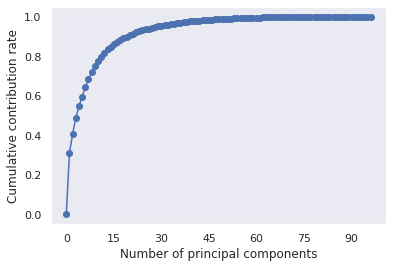

In [92]:
pca.fit(x)
x = pca.transform(x)

# 累積寄与率を図示する
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [94]:
x=pd.DataFrame(x, columns=["PC{}".format(x + 1) for x in range(len(datas.drop(['label', 'user'], axis=1).columns))])

In [98]:
svc_k=svm.SVC(kernel='rbf', gamma=0.005, C=1.0, class_weight='balanced', random_state=0, max_iter=10000)
accuracy=list()
times=list()

for i in range(5, 95, 10):
    df=x_train.iloc[:, 0:i]
    df_test=x_test.iloc[:, 0:i]
    svc_k=svm.SVC(kernel='rbf', gamma=i, C=1.0, class_weight='balanced', random_state=0, max_iter=10000)
    svc_k.fit(df, y_train)
    start = time.time()
    svc_k.predict(df_test)
    elapsed_time = time.time() - start
    accuracy.append(scores.mean())
    times.append(elapsed_time)
    print("PCA = {0}".format(i))
    print ("処理時間:{0}".format(elapsed_time) + "[sec]")

/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 5
処理時間:2.9207661151885986[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 15
処理時間:3.3105814456939697[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 25
処理時間:3.78362774848938[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 35
処理時間:4.764891147613525[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 45
処理時間:6.031286716461182[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 55
処理時間:7.515610694885254[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 65
処理時間:9.445947170257568[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 75
処理時間:10.665179252624512[sec]


/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nishiolab/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


PCA = 85
処理時間:12.233988523483276[sec]


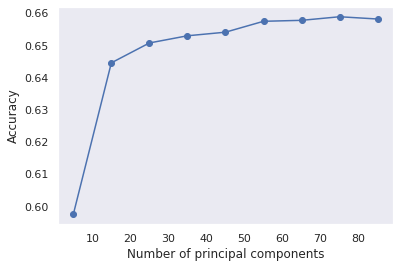

In [75]:
pca.fit(x)
x = pca.transform(x)

# 累積寄与率を図示する
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot(list(range(5, 95, 10)), (accuracy), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

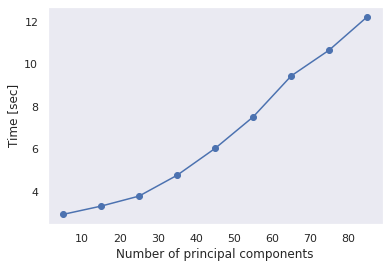

In [99]:
pca.fit(x)
x = pca.transform(x)

# 累積寄与率を図示する
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot(list(range(5, 95, 10)), (times), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Time [sec]")
plt.grid()
plt.show()